In [1]:
# DS Modules
import numpy as np
import pandas as pd

# Visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import ip_tk

In [2]:
df = acquire.wrangle_data()

Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? 

Does it appear that any web-scraping is happening? 

Are there any suspicious IP addresses?

## Are there any suspicious IP addresses?

In [2]:
df = ip_tk.wrangle_ip_merged()
df.head()

,ip,endpoint,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program,...,status,delay,city,regionCode,regionName,countryCode,countryName,continentName,latitude,longitude
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-26 09:55:03,97.105.19.61,/,1,8.0,Hampton,#hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1.0,Full Stack PHP,...,200.0,1ms,Euless,TX,Texas,US,United States,North America,32.8548,-97.0819
2018-01-26 09:56:02,97.105.19.61,java-ii,1,8.0,Hampton,#hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1.0,Full Stack PHP,...,200.0,1ms,Euless,TX,Texas,US,United States,North America,32.8548,-97.0819
2018-01-26 09:56:05,97.105.19.61,java-ii/object-oriented-programming,1,8.0,Hampton,#hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1.0,Full Stack PHP,...,200.0,1ms,Euless,TX,Texas,US,United States,North America,32.8548,-97.0819
2018-01-26 09:56:06,97.105.19.61,slides/object_oriented_programming,1,8.0,Hampton,#hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1.0,Full Stack PHP,...,200.0,1ms,Euless,TX,Texas,US,United States,North America,32.8548,-97.0819
2018-01-26 09:56:24,97.105.19.61,javascript-i/conditionals,2,22.0,Teddy,#teddy,2018-01-08 00:00:00,2018-05-17 00:00:00,2.0,Full Stack Java,...,200.0,1ms,Euless,TX,Texas,US,United States,North America,32.8548,-97.0819


In [3]:
df.cohort_name.isna().sum()

52893

### Are foreign ips a source of malicous traffic?

#### Initial wandering

In [5]:
foreign_ips = df[df.countryCode != 'US']
foreign_ips.head()

,ip,endpoint,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program,...,status,delay,city,regionCode,regionName,countryCode,countryName,continentName,latitude,longitude
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-28 23:42:55,24.160.159.122,/,54,NaN,NaN,NaN,NaT,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-28 23:43:12,24.160.159.122,spring/extra-features,54,NaN,NaN,NaN,NaT,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-29 00:00:06,24.160.159.122,/,54,NaN,NaN,NaN,NaT,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-29 00:00:10,24.160.159.122,mkdocs/search_index.json,54,NaN,NaN,NaN,NaT,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-29 00:00:24,24.160.159.122,appendix/capstone-workbook,54,NaN,NaN,NaN,NaT,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
temp = foreign_ips.groupby([pd.Grouper(freq='D'),'countryName']).size().reset_index().rename(columns={0:'count'})
temp.head()

,datetime,countryName,count
0,2018-03-06,Mexico,25
1,2018-03-31,Mexico,5
2,2018-04-01,Germany,8
3,2018-04-01,Mexico,11
4,2018-04-02,Mexico,1


In [7]:
mex = df[df.countryName == 'Mexico']
mex.head()

,ip,endpoint,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program,...,status,delay,city,regionCode,regionName,countryCode,countryName,continentName,latitude,longitude
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-06 08:36:06,187.220.23.224,/,64,1.0,Arches,#arches,2014-02-04 00:00:00,2014-04-22 00:00:00,1.0,Full Stack PHP,...,200.0,1ms,Mexico City,CMX,Mexico City,MX,Mexico,North America,19.4121,-99.0643
2018-03-06 08:36:10,187.220.23.224,html-css,64,1.0,Arches,#arches,2014-02-04 00:00:00,2014-04-22 00:00:00,1.0,Full Stack PHP,...,200.0,1ms,Mexico City,CMX,Mexico City,MX,Mexico,North America,19.4121,-99.0643
2018-03-06 08:36:12,187.220.23.224,html-css/forms,64,1.0,Arches,#arches,2014-02-04 00:00:00,2014-04-22 00:00:00,1.0,Full Stack PHP,...,200.0,1ms,Mexico City,CMX,Mexico City,MX,Mexico,North America,19.4121,-99.0643
2018-03-06 08:36:14,187.220.23.224,html-css/css-i,64,1.0,Arches,#arches,2014-02-04 00:00:00,2014-04-22 00:00:00,1.0,Full Stack PHP,...,200.0,1ms,Mexico City,CMX,Mexico City,MX,Mexico,North America,19.4121,-99.0643
2018-03-06 08:36:16,187.220.23.224,html-css/forms,64,1.0,Arches,#arches,2014-02-04 00:00:00,2014-04-22 00:00:00,1.0,Full Stack PHP,...,200.0,1ms,Mexico City,CMX,Mexico City,MX,Mexico,North America,19.4121,-99.0643


<AxesSubplot:xlabel='datetime'>

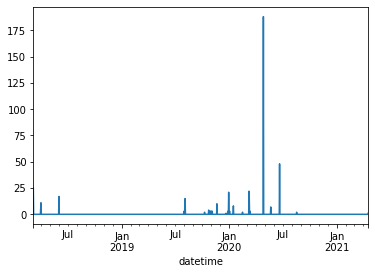

In [8]:
mex.resample('D').ip.size().plot()

In [9]:
mex.groupby([pd.Grouper(freq='D'),'ip']).size().nlargest()

datetime    ip            
2020-04-26  104.238.45.6      186
2020-06-20  104.238.45.4       44
2018-03-06  187.220.23.224     25
2020-03-08  187.201.71.67      22
2019-12-30  189.140.41.75      21
dtype: int64

<AxesSubplot:xlabel='datetime'>

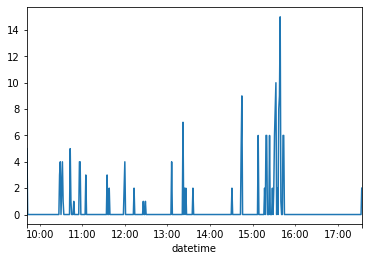

In [10]:
mex.loc['2020-04-26'].ip.resample('min').count().tz_localize('utc').tz_convert('us/central').plot()

<AxesSubplot:xlabel='datetime'>

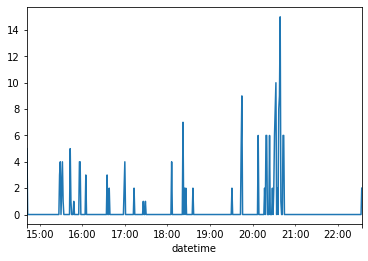

In [11]:
mex.loc['2020-04-26'].ip.resample('min').count().plot()

In [12]:
df.head()

,ip,endpoint,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program,...,status,delay,city,regionCode,regionName,countryCode,countryName,continentName,latitude,longitude
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-26 09:55:03,97.105.19.61,/,1,8.0,Hampton,#hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1.0,Full Stack PHP,...,200.0,1ms,Euless,TX,Texas,US,United States,North America,32.8548,-97.0819
2018-01-26 09:56:02,97.105.19.61,java-ii,1,8.0,Hampton,#hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1.0,Full Stack PHP,...,200.0,1ms,Euless,TX,Texas,US,United States,North America,32.8548,-97.0819
2018-01-26 09:56:05,97.105.19.61,java-ii/object-oriented-programming,1,8.0,Hampton,#hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1.0,Full Stack PHP,...,200.0,1ms,Euless,TX,Texas,US,United States,North America,32.8548,-97.0819
2018-01-26 09:56:06,97.105.19.61,slides/object_oriented_programming,1,8.0,Hampton,#hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1.0,Full Stack PHP,...,200.0,1ms,Euless,TX,Texas,US,United States,North America,32.8548,-97.0819
2018-01-26 09:56:24,97.105.19.61,javascript-i/conditionals,2,22.0,Teddy,#teddy,2018-01-08 00:00:00,2018-05-17 00:00:00,2.0,Full Stack Java,...,200.0,1ms,Euless,TX,Texas,US,United States,North America,32.8548,-97.0819


#### Are there any users who moved around the world a lot?

In [13]:
temp = df.groupby(['user_id',pd.Grouper(freq='D')]).countryName.value_counts().rename('vcount')
temp

user_id  datetime    countryName  
1        2018-01-26  United States     7
         2018-01-27  United States     1
         2018-01-29  United States     6
         2018-01-30  United States     5
         2018-01-31  United States     6
                                      ..
980      2021-04-14  United States     1
         2021-04-19  United States     1
981      2021-04-19  United States    25
         2021-04-20  United States     9
         2021-04-21  United States     8
Name: vcount, Length: 74427, dtype: int64

In [14]:
temp = temp.reset_index()


In [15]:
a = temp[temp.user_id == 12].groupby('datetime').countryName.nunique()

In [16]:
a[a > 1].index

DatetimeIndex(['2020-01-30'], dtype='datetime64[ns]', name='datetime', freq=None)

In [17]:
temp[(temp.datetime == '2018-04-01') & (temp.user_id == 12)]

,user_id,datetime,countryName,vcount
2253,12,2018-04-01,Germany,8


In [18]:
temp = df.groupby(['user_id',pd.Grouper(freq='2D')]).countryName.value_counts().rename('vcount')
temp = temp.reset_index()
 

In [19]:
temp.head()

,user_id,datetime,countryName,vcount
0,1,2018-01-26,United States,8
1,1,2018-01-28,United States,6
2,1,2018-01-30,United States,11
3,1,2018-02-01,United States,14
4,1,2018-02-03,United States,5


{
    when:
    where:
    user:
}

In [20]:
geoHop_events = {}
key = 0
for user in temp.user_id.unique().tolist():
    this = temp[temp.user_id == user]
    log = this.groupby('datetime').countryName.nunique()
    events = log[log > 1].index.tolist()
    if len(events) > 0:
        for  event in events:
            countries = this[this.datetime == event].countryName.unique().tolist()
            entry = {   'window_start': event,
                        'window_end': event + pd.Timedelta('2D'),
                        'where':countries,
                        'user_id': user}
            geoHop_events[key]= entry
            key += 1

geoHop_events

{0: {'window_start': Timestamp('2018-04-02 00:00:00'),
  'window_end': Timestamp('2018-04-04 00:00:00'),
  'where': ['United States', 'Mexico'],
  'user_id': 3},
 1: {'window_start': Timestamp('2020-01-30 00:00:00'),
  'window_end': Timestamp('2020-02-01 00:00:00'),
  'where': ['Canada', 'United States'],
  'user_id': 12},
 2: {'window_start': Timestamp('2018-04-18 00:00:00'),
  'window_end': Timestamp('2018-04-20 00:00:00'),
  'where': ['Canada', 'France', 'United States'],
  'user_id': 32},
 3: {'window_start': Timestamp('2018-03-05 00:00:00'),
  'window_end': Timestamp('2018-03-07 00:00:00'),
  'where': ['Mexico', 'United States'],
  'user_id': 64},
 4: {'window_start': Timestamp('2019-08-01 00:00:00'),
  'window_end': Timestamp('2019-08-03 00:00:00'),
  'where': ['United States', 'Mexico'],
  'user_id': 64},
 5: {'window_start': Timestamp('2020-02-15 00:00:00'),
  'window_end': Timestamp('2020-02-17 00:00:00'),
  'where': ['United States', 'Mexico'],
  'user_id': 64},
 6: {'window_

In [30]:
pd.DataFrame.from_dict(geoHop_events, orient='index')

,window_start,window_end,where,user_id
0,2018-04-02,2018-04-04,"[United States, Mexico]",3
1,2020-01-30,2020-02-01,"[Canada, United States]",12
2,2018-04-18,2018-04-20,"[Canada, France, United States]",32
3,2018-03-05,2018-03-07,"[Mexico, United States]",64
4,2019-08-01,2019-08-03,"[United States, Mexico]",64
5,2020-02-15,2020-02-17,"[United States, Mexico]",64
6,2020-08-17,2020-08-19,"[United States, Mexico]",64
7,2018-04-12,2018-04-14,"[United States, France]",121
8,2018-07-27,2018-07-29,"[United States, Canada]",128
9,2018-07-29,2018-07-31,"[United States, Canada]",128


In [5]:
df.index.name

'datetime'

In [11]:
def detect_country_geohop_events(df, window='1D', group_by='user_id'):
    """Given a time-indexed dataframe with ip geolocation information merged onto it, 
    list events where the group_by variable appears in different countries within the same window."""
    # First do the appropriate grouping.
    temp = df.groupby([group_by,pd.Grouper(freq=window)]).countryName.value_counts()
    
    # Then parse the grouping to collect the events.
    temp = temp.rename('vcount').reset_index()
    idxName = df.index.name
    what = df[group_by].name
    geoHop_events = {}
    key = 0
    for thing in temp[group_by].unique().tolist():
        this = temp[temp[group_by] == thing]
        log = this.groupby(idxName).countryName.nunique()
        events = log[log > 1].index.tolist()
        if len(events) > 0:
            for  event in events:
                countries = this[this.datetime == event].countryName.unique().tolist()
                entry = {   'when_start': event,
                            'when_end': event + pd.Timedelta(window),
                            'where':countries,
                            what: thing}
                geoHop_events[key]= entry
                key += 1
    return pd.DataFrame.from_dict(geoHop_events, orient='index')

In [17]:
detect_country_geohop_events(df, window='1H')

,when_start,when_end,where,user_id
0,2020-02-15 00:00:00,2020-02-15 01:00:00,"[Mexico, United States]",64
1,2018-07-28 11:00:00,2018-07-28 12:00:00,"[United States, Canada]",128
2,2018-07-29 16:00:00,2018-07-29 17:00:00,"[United States, Canada]",128
3,2019-01-11 09:00:00,2019-01-11 10:00:00,"[Germany, United States]",270
4,2019-01-14 09:00:00,2019-01-14 10:00:00,"[United States, Germany]",270
5,2019-12-08 12:00:00,2019-12-08 13:00:00,"[Germany, Australia]",469
6,2019-12-12 10:00:00,2019-12-12 11:00:00,"[Australia, United States]",469
7,2019-12-16 10:00:00,2019-12-16 11:00:00,"[Canada, United States]",469
8,2020-01-03 21:00:00,2020-01-03 22:00:00,"[Canada, United States]",469
9,2020-04-16 16:00:00,2020-04-16 17:00:00,"[Switzerland, United States]",570


## What's the story with null cohort ids?

In [22]:
na = df[df.cohort_id.isna()]
na.head()

,ip,endpoint,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program,...,status,delay,city,regionCode,regionName,countryCode,countryName,continentName,latitude,longitude
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-26 16:46:16,97.105.19.61,/,48,NaN,NaN,NaN,NaT,NaT,NaN,NaN,...,200.0,1ms,Euless,TX,Texas,US,United States,North America,32.8548,-97.0819
2018-01-26 16:46:24,97.105.19.61,spring/extra-features/form-validation,48,NaN,NaN,NaN,NaT,NaT,NaN,NaN,...,200.0,1ms,Euless,TX,Texas,US,United States,North America,32.8548,-97.0819
2018-01-26 17:54:24,97.105.19.61,/,48,NaN,NaN,NaN,NaT,NaT,NaN,NaN,...,200.0,1ms,Euless,TX,Texas,US,United States,North America,32.8548,-97.0819
2018-01-26 18:32:03,97.105.19.61,/,48,NaN,NaN,NaN,NaT,NaT,NaN,NaN,...,200.0,1ms,Euless,TX,Texas,US,United States,North America,32.8548,-97.0819
2018-01-26 18:32:17,97.105.19.61,mysql/relationships/joins,48,NaN,NaN,NaN,NaT,NaT,NaN,NaN,...,200.0,1ms,Euless,TX,Texas,US,United States,North America,32.8548,-97.0819


In [23]:
na.isna().sum()

ip                   0
endpoint             0
user_id              0
cohort_id        52893
cohort_name      52893
slack            52893
start_date       52893
end_date         52893
program_id       52893
program          52893
module            4459
lesson           27219
status           31467
delay            31467
city             31588
regionCode       31576
regionName       31576
countryCode      31467
countryName      31467
continentName    31467
latitude         31467
longitude        31467
dtype: int64

In [24]:
na.user_id.value_counts()

354    2965
736    2358
363    2248
716    2136
368    2085
       ... 
644       6
663       4
62        4
89        3
176       3
Name: user_id, Length: 78, dtype: int64

In [25]:
na_users = na.user_id.unique().tolist()

In [26]:
df.cohort_name = df.cohort_name.fillna('error')

In [27]:
df[df.user_id.isin(na_users)].groupby(['user_id', 'cohort_name']).size()

user_id  cohort_name
48       error          1581
54       error           146
58       error           462
59       error            42
61       error           816
                        ... 
744      error            69
782      error           370
810      error           709
814      error           187
815      error            46
Length: 92, dtype: int64

In [28]:
df[df.user_id == 61]

,ip,endpoint,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program,...,status,delay,city,regionCode,regionName,countryCode,countryName,continentName,latitude,longitude
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-29 13:00:48,67.10.168.76,index.html,61,NaN,error,NaN,NaT,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-29 13:00:57,67.10.168.76,java-i/control-statements-and-loops,61,NaN,error,NaN,NaT,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-29 13:00:59,67.10.168.76,slides/control_statements_and_loops,61,NaN,error,NaN,NaT,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-30 17:25:50,173.173.114.158,index.html,61,NaN,error,NaN,NaT,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-30 17:26:00,173.173.114.158,java-ii/arrays,61,NaN,error,NaN,NaT,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-17 11:37:15,70.121.163.5,java-ii,61,NaN,error,NaN,NaT,NaT,NaN,NaN,...,200.0,1ms,San Antonio,TX,Texas,US,United States,North America,29.5826,-98.4091
2018-09-17 11:37:20,70.121.163.5,java-iii,61,NaN,error,NaN,NaT,NaT,NaN,NaN,...,200.0,1ms,San Antonio,TX,Texas,US,United States,North America,29.5826,-98.4091
2018-09-17 11:37:22,70.121.163.5,java-ii,61,NaN,error,NaN,NaT,NaT,NaN,NaN,...,200.0,1ms,San Antonio,TX,Texas,US,United States,North America,29.5826,-98.4091
